# The rules
An algorythm should be:




### Unambiguous
Algorithm should be clear and unambiguous. Each of its steps (or phases), and their inputs/outputs should be clear and must lead to only one meaning.

### Input
An algorithm should have 0 or more well-defined inputs.

### Output
An algorithm should have 1 or more well-defined outputs, and should match the desired output.

### Independent
An algorithm should have step-by-step directions, which should be independent of any programming code.


# Divide and conquer
Divide and conquer is an approach to solve problems, here is how it work:

- Split the problem into step
- Split each step into sub steps, split each sub steps into even smaller steps, until you get to only no divisible steps
- Generally, at this part, the sub problems are easy to resolve
- Merge them

# Exercises

### 1) Catch the mouse

Cat A and cat B are aiming to a mouse, given both of the distances from each cat to the mouse and the speed of each cat, find which one will catch it first

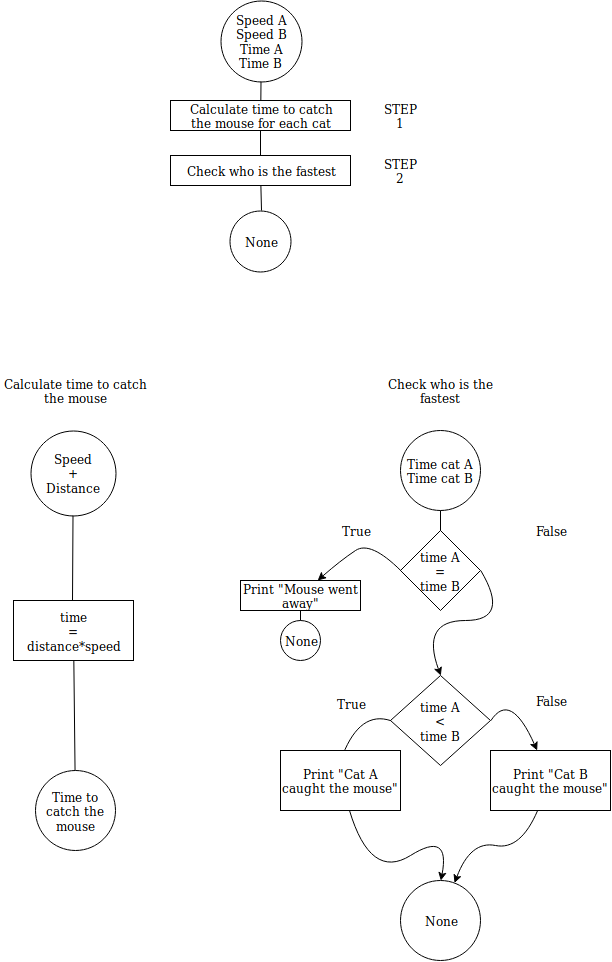

In [25]:
cat_a_speed = 20
cat_b_speed = 5
cat_a_dist  = 6
cat_b_dist  = 2
#### YOUR CODE HERE ####
def time2mouse(cat_speed, cat_distance):
    time = cat_distance/cat_speed
    return time

def fastest_cat(cat_a_time, cat_b_time):
    if cat_a_time == cat_b_time:
        print("Mouse went away")
        return
    
    if cat_a_time < cat_b_time:
        print("Cat A caught the mouse!")
    else:
        print("Cat B caught the mouse!")
    return

def first_to_catch(speed_a, speed_b, distance_a, distance_b):
    time_a = time2mouse(speed_a, distance_a)
    time_b = time2mouse(speed_b, distance_b)
    fastest_cat(time_a, time_b)
    
#### END OF YOUR CODE ####

first_to_catch(cat_a_speed, cat_a_dist, cat_b_speed, cat_b_dist)

Cat A caught the mouse!


### 2) Channel
You have some files, each filename is a number, in each file, there are instructions for the next file. And at the end, the solution.
<br><br>
<small>The file is here: www.pythonchallenge.com/pc/def/channel.zip</small>
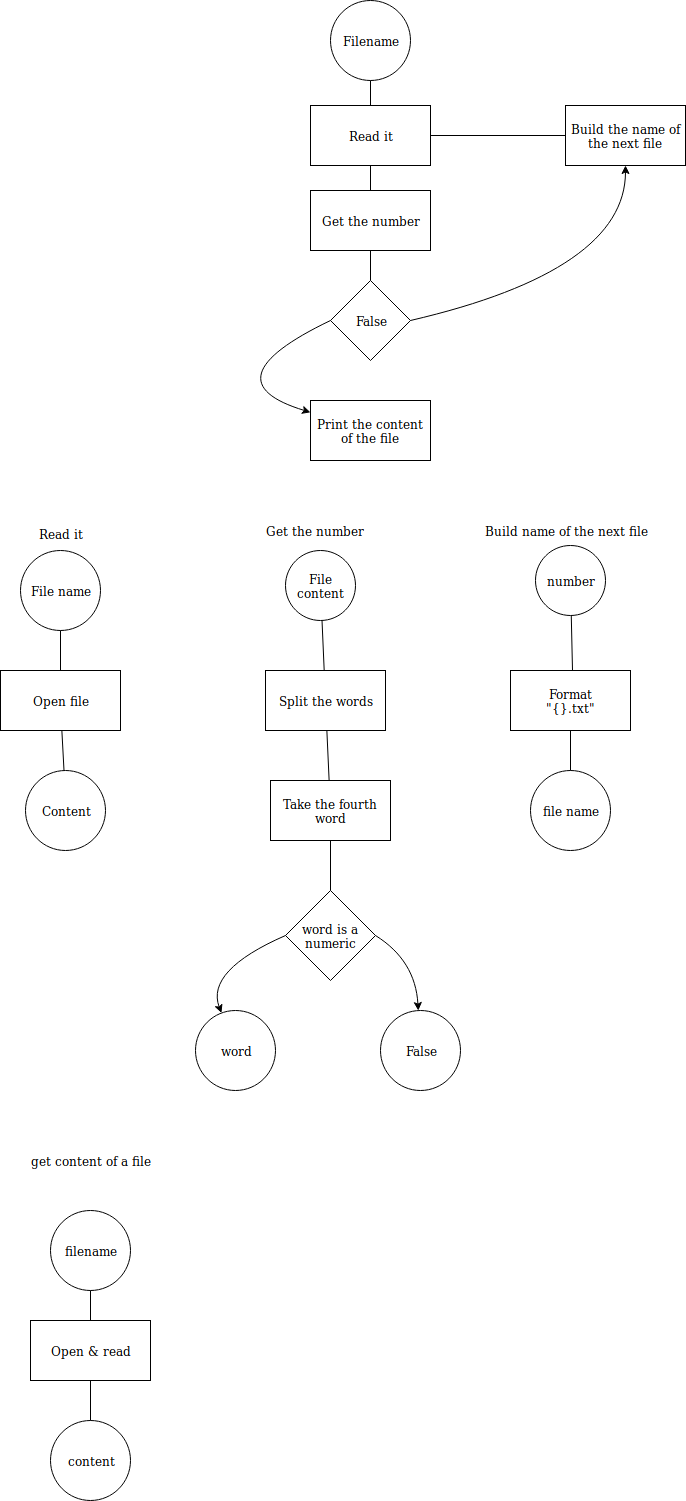

### 3) The turtle

You need to help a turtle to find his leatuce, given a board with the position of the turtle and the position of the salad, return a list of moves that the turtle needs to do, possible moves are `Left`, `Right`, `Up`, `Down`

In [ ]:
board = [
    [' ', ' ', ' ', ' '],
    [' ', 'T', ' ', ' '],
    [' ', ' ', ' ', 'L'],
    [' ', ' ', ' ', ' '],
        ]

##### YOUR CODE HERE #####

##### END OF YOUR CODE #####
import numpy as np

turtle_moves = get_turtle_moves(board) # ['Right', 'Right', 'Down']